# Comparações e Tendências

Este notebook analisa:

- Compara Santa Rosa com municípios da região (Ijuí, Santo Ângelo).
- Avalia se a demanda cresce acima da média regional.
- Tendências de aumento (por exemplo, envelhecimento –> mais procedimentos cardiológicos e oncológicos).

# Santa Rosa x Ijuí e Santo Ângelo

Colunas disponíveis no DataFrame: Index(['Idade', 'Procedimento', 'TotalProcedimentos'], dtype='object')


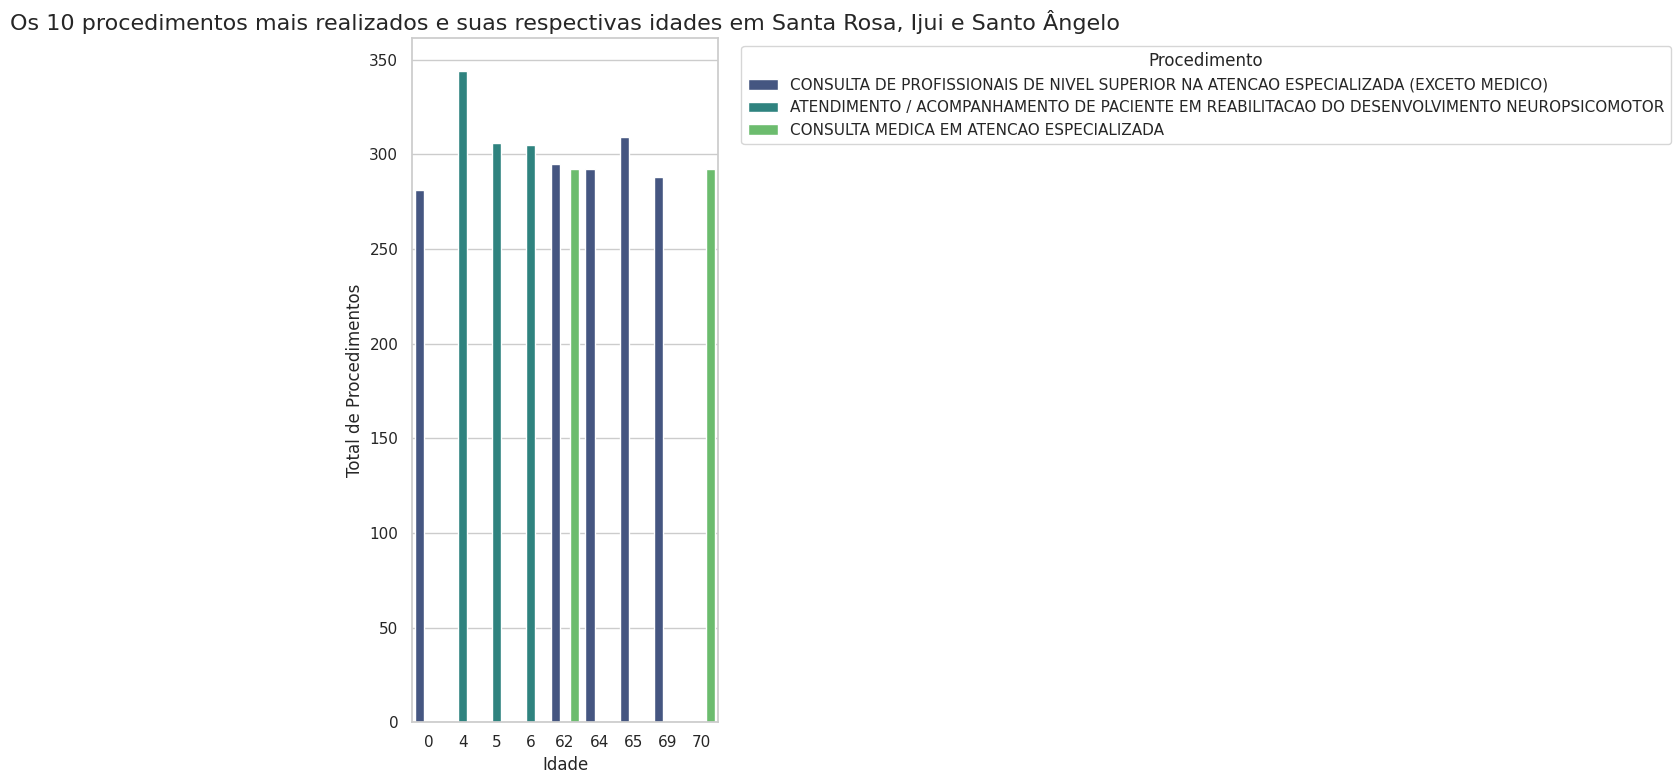

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mysql.connector

# Conexão com o banco de dados
connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

# Query para obter os dados necessários
query = """
SELECT 
    p.PA_IDADE AS Idade,
    s.ip_dscr AS Procedimento,
    COUNT(*) AS TotalProcedimentos
FROM pars p
JOIN tb_sigtaw s
      ON p.PA_PROC_ID = s.ip_cod
WHERE p.PA_UFMUN IN (431720, 431020, 431750)
  AND p.PA_IDADE < 999
GROUP BY 
    p.PA_IDADE,
    s.ip_dscr
ORDER BY 
    TotalProcedimentos desc
    limit 10

"""

# Carregar os dados em um DataFrame
cursor = connection.cursor(dictionary=True)
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 8))
grafico = sns.barplot(data=df, x='Idade', y='TotalProcedimentos', hue='Procedimento', palette='viridis')

grafico.set_title('Os 10 procedimentos mais realizados e suas respectivas idades em Santa Rosa, Ijui e Santo Ângelo', fontsize=16)
grafico.set_xlabel('Idade', fontsize=12)
grafico.set_ylabel('Total de Procedimentos', fontsize=12)
plt.legend(title='Procedimento', title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Fechar a conexão com o banco de dados
cursor.close()
connection.close()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mysql.connector

# Conexão com o banco de dados
connection = mysql.connector.connect(
    host='192.168.196.63',
    user='root',
    password='ABC!abc123',
    database='projeto1'
)

# Query para obter os dados necessários
query = """
SELECT COUNT(p.PA_PROC_ID) as TotalProcedimentos, mun.ds_nome as NomeMunicipio
FROM pars p
JOIN tb_municip mun
ON mun.co_municip = p.PA_UFMUN
WHERE p.PA_UFMUN IN (431720, 431020, 431750)
GROUP BY p.PA_UFMUN, mun.ds_nome
ORDER BY TotalProcedimentos DESC
"""

